<a href="https://colab.research.google.com/github/vistav/random/blob/master/A2_SanilAndapally.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CISC/CMPE 452/COGS 400 Assignment 2 - Backpropagation (15 points)  

Please put your name and student id here

    FirstName LastName, #12345678

- The notebook file has clearly marked blocks where you are expected to write code. Do not write or modify any code outside of these blocks.
- Make sure to restart and run all the cells from the beginning before submission. Do not clear out the outputs. You will only get credit for code that has been run.
- Mark will be deducted based on late policy (-1% of the course total marks per day after due date until the end date after which no assignments will be accepted)


## [Part 1 (9 points)](#Part-1)  

### Build Model1 (7 points)  
Use Pytorch to implement a three-layer Neural Network (input layer - hidden layer - output layer) and update the weights with backpropagation  
- 1. Implement forward and calculate the output (1 point)  
- 2. Calculate errors and loss (3 points)  
- 3. Update the weights with backpropagation (1 points)  
- 4. Predict function (1 point)  
- 5. Activation function (Sigmoid function) (1 point)  

### Evaluator Function (1 point)  
Implement the evaluator function with Pytorch or Numpy only   
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

### Train and Evaluate Model1 (1 point)  
Train Model1 with customized hidden size, learning rate, number of iterations and batch size  
Use the predict function to predict the labels with the test dataset  
Evaluate the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

## [Part 2 (6 points)](#Part-2)  

Use another machine learning framework (**scikit-learn, Tensorflow and Pytorch**) to build MLP
e.g. 
  1. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
  2. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
  3. https://pytorch.org/tutorials/beginner/examples_nn/polynomial_nn.html#sphx-glr-beginner-examples-nn-polynomial-nn-py
  
### Build Model2-1 (2 points)  
Implement Model2-1 with the same hidden nodes and optimization function as the model in Part 1  
Train and validate model. Use the best model on validation dataset to test on the test dataset  

### Train and Evaluate Model2-1 (1 point)
Evaluate the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

### Build Model2-2 (2 points)  
Add one more hidden layer (2 hidden layers in total) to the model  
Describe Model2-2 (number of hidden nodes)  
Train and validate model. Use the best model on validation dataset to test on the test dataset  

### Train and Evaluate Model2-2 (1 point)
Evaluate the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import numpy as np

In [3]:
# you can go to Edit - Notebook settings to select GPU under the Hardware accelerator
# check the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
# build the dataset (train, validation and test)
def load_MNIST(n_val=10000, n_sample=1000, sample=False):
    n_val = n_val
    n_sample = n_sample
    train = MNIST(root = '.', train = True, download = True)
    test = MNIST(root = '.', train = False, download = True)
    
    # data preprocessing
    x_train, x_test = train.data/255, test.data/255
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)
    y_train = torch.nn.functional.one_hot(train.targets)
    y_test = torch.nn.functional.one_hot(test.targets)

    data_dict = {}
    if sample:
        data_dict['x_train'] = x_train[:-n_val][:n_sample]
        data_dict['y_train'] = y_train[:-n_val][:n_sample]
        data_dict['x_val'] = x_train[-n_val:][:n_sample//10]
        data_dict['y_val'] = y_train[-n_val:][:n_sample//10]
        data_dict['x_test'] = x_test[:n_sample//10]
        data_dict['y_test'] = y_test[:n_sample//10]
    else:
        data_dict['x_train'] = x_train[:-n_val]
        data_dict['y_train'] = y_train[:-n_val]
        data_dict['x_val'] = x_train[-n_val:]
        data_dict['y_val'] = y_train[-n_val:]
        data_dict['x_test'] = x_test
        data_dict['y_test'] = y_test
    return data_dict

In [5]:
# you can start with a small sample dataset by setting sample=True
data_dict = load_MNIST(sample=False)
print('Train data shape:', data_dict['x_train'].shape)
print('Train labels shape:', data_dict['y_train'].shape)
print('Validation data shape:', data_dict['x_val'].shape)
print('Validation labels shape:', data_dict['y_val'].shape)
print('Test data shape:', data_dict['x_test'].shape)
print('Test labels shape:', data_dict['y_test'].shape)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Train data shape: torch.Size([50000, 784])
Train labels shape: torch.Size([50000, 10])
Validation data shape: torch.Size([10000, 784])
Validation labels shape: torch.Size([10000, 10])
Test data shape: torch.Size([10000, 784])
Test labels shape: torch.Size([10000, 10])


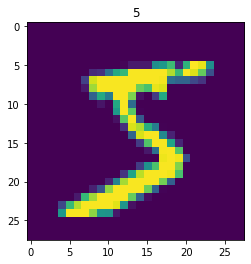

In [6]:
# plot an example
plt.imshow(data_dict['x_train'][0].reshape(28, 28))
plt.title(data_dict['y_train'][0].argmax().item())
plt.show()

In [7]:
def evaluator(y_test, y_pred):
    ####################################################################################################
    # enter code here to implement the evaluation metrics including confusion matrix, accuracy, precision and recall
    # you can only use Numpy or Pytorch to implement the metrics
    
    #set initial parameters
    classes = [0,1,2,3,4,5,6,7,8,9]
    true_pos = np.zeros(10) 
    false_pos = np.zeros(10) 
    true_neg = np.zeros(10) 
    false_neg = np.zeros(10)
    confusion_matrix = np.zeros((10,10), float)

    # congregate tp, tn, fp, fn
    for true, pred in zip(y_test, y_pred):

      #iterate through classes
      for i in classes:

        #if current class is true
        if(true == i):
          
          #if prediction is correct and positive
          if(pred == i):
            true_pos[i] += 1
          
          # if prediction is positive but incorrect
          else:
            false_neg[i] += 1

            #populate confusion matrix
            for j in classes:
                if(pred == j):
                  confusion_matrix[i][j] += 1

        else:

          # correctly predict negative
          if(pred != i):
            true_neg[i] += 1
          # incorrectly predict positive
          else:
            false_pos[i] += 1
    
    #plot confusion matrix
    np.fill_diagonal(confusion_matrix,true_pos)
    plt.figure(figsize = (10,10))
    plt.title("Confusion Matrix")
    plt.xlabel("Predict")
    plt.ylabel("Truth")
    plt.xticks(ticks= classes,labels=classes)
    plt.yticks(ticks= classes,labels=classes)

    for i in range(10):
      for j in range(10):
        plt.annotate(confusion_matrix[i][j], xy=(j,i), horizontalalignment='center')

    plt.imshow(confusion_matrix)
    plt.show()

    #get average values
    true_pos_avg = np.sum(true_pos) / len(true_pos)
    false_neg_avg = np.sum(false_neg) / len(false_neg)
    true_neg_avg = np.sum(true_neg) / len(true_neg)
    false_pos_avg = np.sum(false_pos) / len(false_pos)

    #calc metrics
    accuracy = (y_pred == y_test).sum() / len(y_test)
    print("Accuracy:\n{}".format(accuracy))

    precision = true_pos/(true_pos + false_pos)
    print("Precision:\n{}".format(precision))

    recall = true_pos/(true_pos + false_neg)
    print("Recall:\n{}".format(recall))

    f1 = 2 * (precision * recall)/(precision + recall)
    print("F1:\n{}".format(f1))
    
    #calc average metrics
    precision_avg = np.sum(precision) / len(precision)
    print("Average Precision:\n{}".format(precision_avg))

    recall_avg = np.sum(recall) / len(recall)
    print("Average Recall:\n{}".format(recall_avg))

    f1_avg = np.sum(f1) / len(f1)
    print("Average F1:\n{}".format(f1_avg))
    
    


####################################################################################################

## Part 1

In [8]:
class NN(object):
    def __init__(self, learning_rate, n_iters, batch_size, hidden_size, device, dtype=torch.float32):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.hidden_size = hidden_size
        self.device = device
        self.dtype = dtype
        self.history = {}
        self.history['train_acc'], self.history['val_acc'], self.history['loss'] = [], [], []
    
    # 5. activation function
    def sigmoid(self, x):
        ####################################################################################################
        # enter code here to implement the activation function
        # sigmoid formula
        sigmoidx = 1/(1 + torch.exp(-x))
        
        return sigmoidx
        ####################################################################################################

    def train(self, x, y, x_val, y_val, verbose=1):
        n_train = x.shape[0]
        n_val = x_val.shape[0]
        input_size = x.shape[1]
        num_classes = y.shape[1]
        
        # weight initialization
        self.W1 = torch.randn(input_size, self.hidden_size, dtype=self.dtype, device=self.device) * 0.01
        self.W2 = torch.randn(self.hidden_size, num_classes, dtype=self.dtype, device=self.device) * 0.01

        # TODO: train the weights with the input data and labels
        for i in range(self.n_iters):
            loss = 0
            data = getBatch(x, y, self.batch_size)
            for x_batch, y_batch in data:
                # 1. forward
                ####################################################################################################
                # enter code here to calculate the hidden layer output and output layer output

                #hidden layer output - sigmoid activation fuction of the products of weights and all x points 
                hidden = self.sigmoid(torch.matmul(x_batch, self.W1))

                #from hidden layer to output - implement sigmoid activation function of the product of hidden layer outputs (output inputs) and weight assignments
                # output = y
                output = self.sigmoid(torch.matmul(hidden, self.W2)) 


                ####################################################################################################

                # 2. error and loss
                ####################################################################################################
                # enter code here to calculate the output error, MSE loss, delta output and delta hidden

                output_error = (y_batch - output)
                loss += torch.sum(output_error**2)/self.batch_size

                
                delta_output = output_error * (output*(1-output))
                delta_hidden = (hidden * (1-hidden)) * torch.matmul(delta_output,torch.t(self.W2))

                ####################################################################################################

                # 3. backward
                ####################################################################################################
                # enter code here to calculate delta weights and update the weights
                delta_weight_jh = self.learning_rate * torch.matmul(torch.t(hidden), delta_output)
                self.W2 += delta_weight_jh


                
                delta_weight_hi = self.learning_rate * torch.matmul(torch.t(x_batch), delta_hidden)
                self.W1 += delta_weight_hi
                ####################################################################################################

            # calculate the accuracy and save the training history
            y_pred = self.predict(x)
            train_acc = torch.sum(torch.argmax(y, dim=1) == y_pred) / n_train
            self.history['train_acc'].append(train_acc.item())
            self.history['loss'].append(loss.item())
            
            y_pred = self.predict(x_val)
            val_acc = torch.sum(torch.argmax(y_val, dim=1) == y_pred) / n_val
            self.history['val_acc'].append(val_acc.item())
            if verbose:
                print('epoch %d, loss %.4f, train acc %.3f, validation acc %.3f'
                  % (i + 1, loss, train_acc, val_acc))
    
    # 4. predict function 
    def predict(self, x):
        ####################################################################################################
        # enter code here to implement the predict function
        # TODO: use the trained weights to predict labels and return the predicted labels
        # remember to use torch.argmax() to return the true labels

        hidden = self.sigmoid(torch.matmul(x, self.W1))
        output = self.sigmoid(torch.matmul(hidden, self.W2))
        y_pred = torch.argmax(output, dim=1)
        
        ####################################################################################################
        return y_pred

def getBatch(x, y, batch_size):
    n_epoch = x.shape[0] // batch_size
    for i in range(n_epoch):
        x_batch = x[i * batch_size : (i+1) * batch_size]
        y_batch = y[i * batch_size : (i+1) * batch_size]
        yield x_batch, y_batch
    x_batch = x[(i+1) * batch_size:]
    y_batch = y[(i+1) * batch_size:]    
    yield x_batch, y_batch

In [9]:
####################################################################################################
# enter code here to train Model1
# TODO: set your desired hidden size, learning rate, number of iterations and batch size
# remeber to load the dataset to the device (e.g. data_dict['x_train'].to(device))

# learning_rate, n_iters, batch_size, hidden_size, device

model1 = NN(0.001, 100, 250, 128, device)
model1.train(data_dict['x_train'].to(device), data_dict['y_train'].to(device), data_dict['x_val'].to(device), data_dict['y_val'].to(device))

####################################################################################################

epoch 1, loss 182.3633, train acc 0.114, validation acc 0.106
epoch 2, loss 179.2520, train acc 0.170, validation acc 0.162
epoch 3, loss 177.4749, train acc 0.217, validation acc 0.211
epoch 4, loss 169.3098, train acc 0.287, validation acc 0.288
epoch 5, loss 150.3909, train acc 0.509, validation acc 0.520
epoch 6, loss 130.2993, train acc 0.601, validation acc 0.611
epoch 7, loss 110.8697, train acc 0.683, validation acc 0.699
epoch 8, loss 96.4963, train acc 0.751, validation acc 0.770
epoch 9, loss 85.7614, train acc 0.796, validation acc 0.818
epoch 10, loss 77.1598, train acc 0.823, validation acc 0.842
epoch 11, loss 70.1875, train acc 0.842, validation acc 0.857
epoch 12, loss 64.6711, train acc 0.855, validation acc 0.869
epoch 13, loss 60.2231, train acc 0.864, validation acc 0.877
epoch 14, loss 56.5426, train acc 0.870, validation acc 0.885
epoch 15, loss 53.4590, train acc 0.876, validation acc 0.890
epoch 16, loss 50.8633, train acc 0.880, validation acc 0.894
epoch 17, 

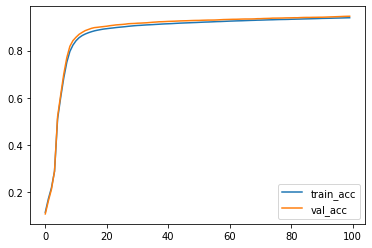

In [10]:
plt.plot(model1.history['train_acc'], label='train_acc')
plt.plot(model1.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

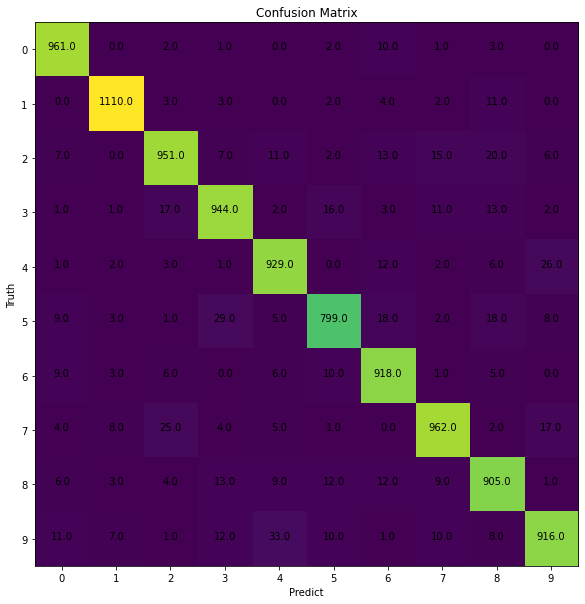

Accuracy:
0.9395
Precision:
[0.95242815 0.9762533  0.93879566 0.93096647 0.929      0.93559719
 0.92633703 0.94778325 0.91321897 0.93852459]
Recall:
[0.98061224 0.97797357 0.92151163 0.93465347 0.94602851 0.89573991
 0.95824635 0.93579767 0.92915811 0.90782953]
F1:
[0.96631473 0.97711268 0.93007335 0.93280632 0.93743693 0.91523482
 0.94202155 0.94175233 0.92111959 0.92292191]
Average Precision:
0.9388904605854205
Average Recall:
0.9387550986985801
Average F1:
0.9386794217421525


In [11]:
####################################################################################################
# enter code here to evaluate Model1 with test set
# TODO: use the trained Model1 to predict the labels of test set and evaluate the results with the evaluator

y_test = torch.argmax(data_dict['y_test'],dim=1).cpu().numpy()
y_pred = model1.predict(data_dict['x_test'].to(device)).cpu().numpy()

evaluator(y_test,y_pred)


####################################################################################################

## Part 2

### Model2-1

In [12]:
# Imports
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [13]:
####################################################################################################
# enter code here to implement Model2-1
# Implement Model2-1 with the same hidden nodes and optimization function as the model in Part 1, train and validate model.

model_2_1 = tf.keras.Sequential()
# 784 input shape to match model above and sigmoid activation function, 128 hidden layer nodes
model_2_1.add(tf.keras.layers.Dense(128, input_shape=(784,), activation='sigmoid'))
# 10 classes output
model_2_1.add(tf.keras.layers.Dense(10, activation='sigmoid'))
#gradient descent optimizer, no momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_2_1.compile(optimizer, loss='mse', steps_per_execution=10, metrics=['accuracy'])

####################################################################################################

In [14]:
####################################################################################################
# enter code here to train Model2-1

# same batch sizes and iterations
train_model_2_1 = model_2_1.fit(data_dict['x_train'].numpy(), data_dict['y_train'].numpy(), epochs=150, batch_size=300, validation_data = (data_dict['x_val'].numpy(), data_dict['y_val'].numpy()))

####################################################################################################

Epoch 1/150
167/167 [==============================] - 2s 9ms/step - loss: 0.1044 - accuracy: 0.1166 - val_loss: 0.0899 - val_accuracy: 0.1743
Epoch 2/150
167/167 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.2027 - val_loss: 0.0887 - val_accuracy: 0.2116
Epoch 3/150
167/167 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.2337 - val_loss: 0.0879 - val_accuracy: 0.2572
Epoch 4/150
167/167 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.2842 - val_loss: 0.0870 - val_accuracy: 0.3229
Epoch 5/150
167/167 [==============================] - 0s 3ms/step - loss: 0.0865 - accuracy: 0.3436 - val_loss: 0.0860 - val_accuracy: 0.3765
Epoch 6/150
167/167 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.3865 - val_loss: 0.0848 - val_accuracy: 0.4358
Epoch 7/150
167/167 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.4345 - val_loss: 0.0836 - val_accuracy: 0.4725

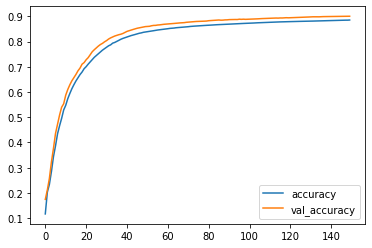

313/313 [==============================] - 0s 1ms/step


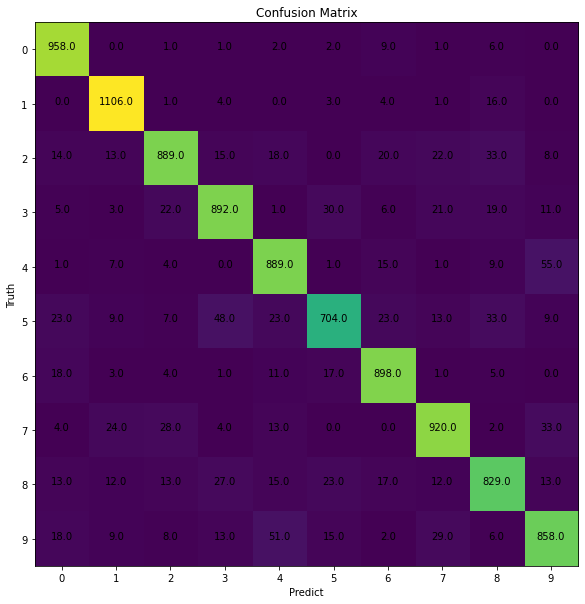

Accuracy:
0.8943
Precision:
[0.90891841 0.93254637 0.90992835 0.88756219 0.86901271 0.88553459
 0.90342052 0.90107738 0.86534447 0.86930091]
Recall:
[0.97755102 0.97444934 0.86143411 0.88316832 0.90529532 0.78923767
 0.93736952 0.89494163 0.85112936 0.85034688]
F1:
[0.94198623 0.95303748 0.88501742 0.8853598  0.88678304 0.83461766
 0.92008197 0.89799902 0.85817805 0.85971944]
Average Precision:
0.8932645898266351
Average Recall:
0.8924923164438792
Average F1:
0.8922780131678826


In [15]:
####################################################################################################
# enter code here to evaluate Model2-1

# History Plot
plt.plot(train_model_2_1.history['accuracy'], label='accuracy')
plt.plot(train_model_2_1.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


y_pred = model_2_1.predict(data_dict['x_test'].numpy())
y_pred = [np.argmax(i) for i in y_pred]
evaluator(y_test,y_pred)

####################################################################################################

### Model2-2

In [19]:
####################################################################################################
# enter code here to implement Model2-2
#Add one more hidden layer (2 hidden layers in total) to the model
#Describe Model2-2 (number of hidden nodes)
#Train and validate model. Use the best model on validation dataset to test on the test dataset

model_2_2 = tf.keras.Sequential()
# 784 input shape, activation is sigmoid for this model. First Hidden layer has 300 nodes
model_2_2.add(tf.keras.layers.Dense(300, input_shape=(784,), activation='sigmoid'))
# second hidden layer, has half as many modes as the stating input layer(150 instead of 300) 
model_2_2.add(tf.keras.layers.Dense(150, activation='sigmoid'))
# 10 classes output
model_2_2.add(tf.keras.layers.Dense(10, activation='softmax'))
# SGD optimizer is used
optimizer = tf.keras.optimizers.SGD(learning_rate=0.12)
model_2_2.compile(optimizer, loss='mse',steps_per_execution=10, metrics=['accuracy'])

####################################################################################################

In [17]:
####################################################################################################
# enter code here to train Model2-2
train_model_2_2 = model_2_2.fit(data_dict['x_train'].numpy(), data_dict['y_train'].numpy(), epochs=150, batch_size=400, validation_data = (data_dict['x_val'].numpy(), data_dict['y_val'].numpy()))

####################################################################################################

Epoch 1/150
125/125 [==============================] - 1s 9ms/step - loss: 0.0912 - accuracy: 0.1210 - val_loss: 0.0902 - val_accuracy: 0.1378
Epoch 2/150
125/125 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.1666 - val_loss: 0.0897 - val_accuracy: 0.2000
Epoch 3/150
125/125 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 0.1893 - val_loss: 0.0896 - val_accuracy: 0.1583
Epoch 4/150
125/125 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.1484 - val_loss: 0.0895 - val_accuracy: 0.1237
Epoch 5/150
125/125 [==============================] - 0s 3ms/step - loss: 0.0895 - accuracy: 0.1339 - val_loss: 0.0894 - val_accuracy: 0.1374
Epoch 6/150
125/125 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.1502 - val_loss: 0.0893 - val_accuracy: 0.1324
Epoch 7/150
125/125 [==============================] - 0s 3ms/step - loss: 0.0893 - accuracy: 0.1594 - val_loss: 0.0892 - val_accuracy: 0.1405

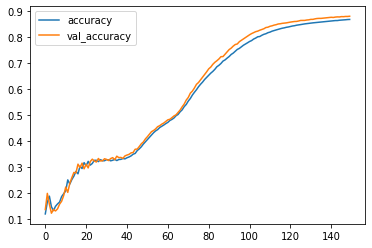

313/313 [==============================] - 0s 1ms/step


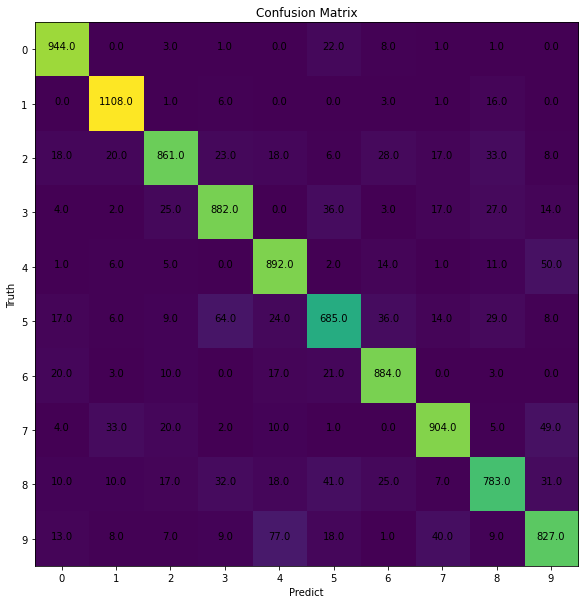

Accuracy:
0.877
Precision:
[0.91561591 0.9264214  0.89874739 0.86555447 0.84469697 0.82331731
 0.88223553 0.90219561 0.85387132 0.8378926 ]
Recall:
[0.96326531 0.97621145 0.83430233 0.87326733 0.90835031 0.76793722
 0.92275574 0.87937743 0.80390144 0.81962339]
F1:
[0.9388364  0.95066495 0.86532663 0.86939379 0.87536801 0.79466357
 0.90204082 0.89064039 0.82813326 0.82865731]
Average Precision:
0.8750548505611428
Average Recall:
0.8748991937311109
Average F1:
0.8743725142481275


In [18]:
####################################################################################################
# enter code here to evaluate Model2-2
# Same evaluation methods are used for this model.
plt.plot(train_model_2_2.history['accuracy'], label='accuracy')
plt.plot(train_model_2_2.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

y_pred = model_2_2.predict(data_dict['x_test'].numpy())
y_pred = [np.argmax(i) for i in y_pred]
evaluator(y_test,y_pred)

####################################################################################################